Universidad del Valle de Guatemala  
Departamento de Ciencias de la Computación  
Inteligencia Artificial  

Nadissa Vela - 23764  
Cristian Túnchez - 231359

---

# Laboratorio 3

## Task 3

### Carga y Exploración Inicial del Dataset

In [6]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [8]:
# Cargar el dataset
df = pd.read_csv("/content/high_diamond_ranked_10min.csv")

# Exploración inicial
print("Dimensiones del dataset:", df.shape)
print("\nPrimeras filas:")
df.head()

Dimensiones del dataset: (9879, 40)

Primeras filas:


,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


In [9]:
# Información general del dataset
print("Información del dataset:")
df.info()

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 no

In [10]:
# Verificar valores nulos
print("Valores nulos por columna:")
print(df.isnull().sum())
print("\nTotal de valores nulos:", df.isnull().sum().sum())

Valores nulos por columna:
gameId                          0
blueWins                        0
blueWardsPlaced                 0
blueWardsDestroyed              0
blueFirstBlood                  0
blueKills                       0
blueDeaths                      0
blueAssists                     0
blueEliteMonsters               0
blueDragons                     0
blueHeralds                     0
blueTowersDestroyed             0
blueTotalGold                   0
blueAvgLevel                    0
blueTotalExperience             0
blueTotalMinionsKilled          0
blueTotalJungleMinionsKilled    0
blueGoldDiff                    0
blueExperienceDiff              0
blueCSPerMin                    0
blueGoldPerMin                  0
redWardsPlaced                  0
redWardsDestroyed               0
redFirstBlood                   0
redKills                        0
redDeaths                       0
redAssists                      0
redEliteMonsters                0
redDragons           

### 1. Limpieza y Pre-procesamiento

#### 1.1 Eliminación de Redundancia y Data Leakage

In [13]:
# Ver olumnas disponibles
print("Columnas del dataset:")
for i, col in enumerate(df.columns, 1):
    print(f"{i}. {col}")

Columnas del dataset:
1. gameId
2. blueWins
3. blueWardsPlaced
4. blueWardsDestroyed
5. blueFirstBlood
6. blueKills
7. blueDeaths
8. blueAssists
9. blueEliteMonsters
10. blueDragons
11. blueHeralds
12. blueTowersDestroyed
13. blueTotalGold
14. blueAvgLevel
15. blueTotalExperience
16. blueTotalMinionsKilled
17. blueTotalJungleMinionsKilled
18. blueGoldDiff
19. blueExperienceDiff
20. blueCSPerMin
21. blueGoldPerMin
22. redWardsPlaced
23. redWardsDestroyed
24. redFirstBlood
25. redKills
26. redDeaths
27. redAssists
28. redEliteMonsters
29. redDragons
30. redHeralds
31. redTowersDestroyed
32. redTotalGold
33. redAvgLevel
34. redTotalExperience
35. redTotalMinionsKilled
36. redTotalJungleMinionsKilled
37. redGoldDiff
38. redExperienceDiff
39. redCSPerMin
40. redGoldPerMin


In [15]:
# Identificar columnas a eliminar

# 1. gameId - No aporta información predictiva, solo identifica la partida
columns_to_drop = ['gameId']

# 2. Todas las columnas que empiezan con 'red' - Son el espejo de las azules
red_columns = [col for col in df.columns if col.startswith('red')]
columns_to_drop.extend(red_columns)

# 3. blueGoldDiff y blueExperienceDiff - Estas ya están implícitas en las
# totales de cada equipo. Además, si solo observáramos el lado azul, no
# sabríamos exactamente estas diferencias sin conocer los valores del equipo rojo
diff_columns = [col for col in df.columns if 'Diff' in col and col.startswith('blue')]
columns_to_drop.extend(diff_columns)

print("Columnas a eliminar:")
for col in columns_to_drop:
    print(f"  - {col}")

print(f"\nTotal de columnas a eliminar: {len(columns_to_drop)}")

Columnas a eliminar:
  - gameId
  - redWardsPlaced
  - redWardsDestroyed
  - redFirstBlood
  - redKills
  - redDeaths
  - redAssists
  - redEliteMonsters
  - redDragons
  - redHeralds
  - redTowersDestroyed
  - redTotalGold
  - redAvgLevel
  - redTotalExperience
  - redTotalMinionsKilled
  - redTotalJungleMinionsKilled
  - redGoldDiff
  - redExperienceDiff
  - redCSPerMin
  - redGoldPerMin
  - blueGoldDiff
  - blueExperienceDiff

Total de columnas a eliminar: 22


In [16]:
# Crear dataset limpio
df_clean = df.drop(columns=columns_to_drop)

print("Dataset original:", df.shape)
print("Dataset limpio:", df_clean.shape)
print("\nColumnas restantes:")
for i, col in enumerate(df_clean.columns, 1):
    print(f"{i}. {col}")

Dataset original: (9879, 40)
Dataset limpio: (9879, 18)

Columnas restantes:
1. blueWins
2. blueWardsPlaced
3. blueWardsDestroyed
4. blueFirstBlood
5. blueKills
6. blueDeaths
7. blueAssists
8. blueEliteMonsters
9. blueDragons
10. blueHeralds
11. blueTowersDestroyed
12. blueTotalGold
13. blueAvgLevel
14. blueTotalExperience
15. blueTotalMinionsKilled
16. blueTotalJungleMinionsKilled
17. blueCSPerMin
18. blueGoldPerMin


#### 1.2 Separación de Variables y División Train/Test


In [17]:
# Separar X (features) y y (target)
X = df_clean.drop('blueWins', axis=1)
y = df_clean['blueWins']

print("Forma de X (features):", X.shape)
print("Forma de y (target):", y.shape)
print("\nFeatures utilizadas:")
for i, col in enumerate(X.columns, 1):
    print(f"{i}. {col}")

Forma de X (features): (9879, 17)
Forma de y (target): (9879,)

Features utilizadas:
1. blueWardsPlaced
2. blueWardsDestroyed
3. blueFirstBlood
4. blueKills
5. blueDeaths
6. blueAssists
7. blueEliteMonsters
8. blueDragons
9. blueHeralds
10. blueTowersDestroyed
11. blueTotalGold
12. blueAvgLevel
13. blueTotalExperience
14. blueTotalMinionsKilled
15. blueTotalJungleMinionsKilled
16. blueCSPerMin
17. blueGoldPerMin


In [18]:
# División Train/Test (80/20)
# random_state=88 para reproducibilidad
# stratify=y para mantener la proporción de clases en ambos conjuntos
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=88,
    stratify=y
)

print("Conjunto de entrenamiento:")
print(f"  X_train: {X_train.shape}")
print(f"  y_train: {y_train.shape}")
print(f"\nConjunto de prueba:")
print(f"  X_test: {X_test.shape}")
print(f"  y_test: {y_test.shape}")

# Verificar distribución de clases
print("\nDistribución en entrenamiento:")
print(y_train.value_counts(normalize=True))
print("\nDistribución en prueba:")
print(y_test.value_counts(normalize=True))

Conjunto de entrenamiento:
  X_train: (7903, 17)
  y_train: (7903,)

Conjunto de prueba:
  X_test: (1976, 17)
  y_test: (1976,)

Distribución en entrenamiento:
blueWins
0    0.500949
1    0.499051
Name: proportion, dtype: float64

Distribución en prueba:
blueWins
0    0.501012
1    0.498988
Name: proportion, dtype: float64


#### 1.3 Escalado de Variables (StandardScaler)

In [27]:
# Ver estadísticas de algunas variables con escala original
print("Estadísticas de algunas variables ANTES del escalado:")
print("\nX_train (conjunto de entrenamiento):")
print(X_train[['blueKills', 'blueTotalGold', 'blueAvgLevel', 'blueTotalExperience']].describe())

Estadísticas de algunas variables ANTES del escalado:

X_train (conjunto de entrenamiento):
         blueKills  blueTotalGold  blueAvgLevel  blueTotalExperience
count  7903.000000    7903.000000   7903.000000          7903.000000
mean      6.198279   16514.168037      6.917803         17934.874225
std       3.023285    1538.789161      0.304652          1196.660191
min       0.000000   10730.000000      4.600000         10098.000000
25%       4.000000   15420.000000      6.800000         17179.000000
50%       6.000000   16407.000000      7.000000         17963.000000
75%       8.000000   17481.500000      7.200000         18731.000000
max      22.000000   23701.000000      8.000000         22224.000000


In [28]:
# Crear el scaler y ajustarlo SOLO con los datos de entrenamiento
scaler = StandardScaler()
scaler.fit(X_train)

# Aplicar la transformación a ambos conjuntos
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convertir de nuevo a DataFrame para facilitar visualización
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

print("Escalado completado!")
print(f"X_train_scaled: {X_train_scaled.shape}")
print(f"X_test_scaled: {X_test_scaled.shape}")

Escalado completado!
X_train_scaled: (7903, 17)
X_test_scaled: (1976, 17)


In [34]:
# Ver las estadísticas DESPUÉS del escalado
print("Estadísticas de las mismas variables DESPUÉS del escalado:")
print("\nX_train_scaled:")
print(X_train_scaled[['blueKills', 'blueTotalGold', 'blueAvgLevel', 'blueTotalExperience']].describe())

print("\n*Todas las variables ahora tienen media ≈ 0 y desviación estándar ≈ 1")

Estadísticas de las mismas variables DESPUÉS del escalado:

X_train_scaled:
          blueKills  blueTotalGold  blueAvgLevel  blueTotalExperience
count  7.903000e+03   7.903000e+03  7.903000e+03         7.903000e+03
mean  -9.305476e-17  -4.182969e-16 -1.940214e-15         1.104070e-15
std    1.000063e+00   1.000063e+00  1.000063e+00         1.000063e+00
min   -2.050310e+00  -3.759147e+00 -7.608528e+00        -6.549370e+00
25%   -7.271620e-01  -7.111028e-01 -3.867067e-01        -6.316932e-01
50%   -6.558814e-02  -6.964880e-02  2.698224e-01         2.350505e-02
75%    5.959857e-01   6.286717e-01  9.263516e-01         6.653319e-01
max    5.227002e+00   4.670742e+00  3.552468e+00         3.584474e+00

*Todas las variables ahora tienen media ≈ 0 y desviación estándar ≈ 1


#### ¿Por qué SVM necesita Escalado y los Árboles no tanto?

SVM funciona calculando **distancias** entre puntos de datos para encontrar el mejor hiperplano de separación. Si una variable tiene valores mucho más grandes (como el oro total), dominará el cálculo de distancia y las otras variables (como el nivel promedio) serán prácticamente ignoradas.  

En contraste, los árboles de decisión funcionan haciendo **divisiones** basadas en umbrales:
- "Si oro > 17,000, entonces..."
- "Si nivel > 6.5, entonces..."  

No les importa la magnitud absoluta de los valores, solo el orden relativo. Un árbol puede decir "si oro > 17,000" igual de bien que "si oro_escalado > 0.5". La escala no afecta la estructura del árbol ni sus decisiones.

### 2. Support Vector Machines

#### 2.1 Entrenar SVM con Kernel Lineal

In [52]:
# Instanciar el clasificador SVC con kernel lineal
svm_linear = SVC(kernel='linear', random_state=88)

# Entrenar el modelo con los datos escalados de entrenamiento
svm_linear.fit(X_train_scaled, y_train)

print("Modelo SVM con kernel lineal entrenado exitosamente!")

Modelo SVM con kernel lineal entrenado exitosamente!


In [53]:
# Predecir sobre el conjunto de prueba escalado con el modelo lineal
y_pred_linear = svm_linear.predict(X_test_scaled)

print("Predicciones del modelo SVM lineal generadas.")

Predicciones del modelo SVM lineal generadas.


#### 2.2 Entrenar SVM con Kernel RBF (Radial Basis Function)


In [55]:
# Instanciar el clasificador SVC con kernel RBF
svm_rbf = SVC(kernel='rbf', random_state=88)

# Entrenar el modelo con los datos escalados de entrenamiento
svm_rbf.fit(X_train_scaled, y_train)

print("Modelo SVM con kernel RBF entrenado exitosamente!")

Modelo SVM con kernel RBF entrenado exitosamente!


In [56]:
# Predecir sobre el conjunto de prueba escalado con el modelo RBF
y_pred_rbf = svm_rbf.predict(X_test_scaled)

print("Predicciones del modelo SVM RBF generadas.")

Predicciones del modelo SVM RBF generadas.


#### 2.3 Comparación del Accuracy

In [54]:
# Calcular accuracy
accuracy_linear = accuracy_score(y_test, y_pred_linear)
print(f"\n{'RESULTADO - SVM Lineal':^80}")
print(f"{'='*80}")
print(f"Accuracy en el conjunto de prueba: {accuracy_linear:.4f} ({accuracy_linear*100:.2f}%)")

# Mostrar reporte de clasificación detallado
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred_linear,
                          target_names=['Red Team Wins (0)', 'Blue Team Wins (1)']))


                             RESULTADO - SVM Lineal                             
Accuracy en el conjunto de prueba: 0.7328 (73.28%)

Reporte de Clasificación:
                    precision    recall  f1-score   support

 Red Team Wins (0)       0.73      0.74      0.73       990
Blue Team Wins (1)       0.74      0.73      0.73       986

          accuracy                           0.73      1976
         macro avg       0.73      0.73      0.73      1976
      weighted avg       0.73      0.73      0.73      1976



In [57]:
# Calcular accuracy
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
print(f"\n{'RESULTADO - SVM RBF':^80}")
print(f"{'='*80}")
print(f"Accuracy en el conjunto de prueba: {accuracy_rbf:.4f} ({accuracy_rbf*100:.2f}%)")

# Mostrar reporte de clasificación detallado
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred_rbf,
                          target_names=['Red Team Wins (0)', 'Blue Team Wins (1)']))


                              RESULTADO - SVM RBF                               
Accuracy en el conjunto de prueba: 0.7282 (72.82%)

Reporte de Clasificación:
                    precision    recall  f1-score   support

 Red Team Wins (0)       0.73      0.73      0.73       990
Blue Team Wins (1)       0.73      0.72      0.73       986

          accuracy                           0.73      1976
         macro avg       0.73      0.73      0.73      1976
      weighted avg       0.73      0.73      0.73      1976



El modelo SVM con kernel lineal tuvo un rendimiento ligeramente mejor.

#### 2.4 Si el Kernel RBF funcionó mejor (o igual), ¿qué nos dice esto sobre la separabilidad lineal de las partidas de LoL?

Dada la diferencia marginal en precisión, donde el kernel lineal tuvo un rendimiento ligeramente superior, los datos parecen ser razonablemente separables linealmente, o al menos un límite de decisión lineal es casi tan efectivo como uno no lineal para este conjunto de datos.

### 3. Árboles de Decisión

#### 3.1 Entrenar DecisionTreeClassifier

In [77]:
dt_model = DecisionTreeClassifier(random_state=88)
dt_model.fit(X_train, y_train)

print("Modelo DecisionTreeClassifier entrenado exitosamente!")

# Información sobre el árbol
n_nodes = dt_model.tree_.node_count
max_depth_actual = dt_model.tree_.max_depth
print(f"\nÁrbol construido con {n_nodes} nodos y profundidad máxima de {max_depth_actual} niveles")

Modelo DecisionTreeClassifier entrenado exitosamente!

Árbol construido con 3327 nodos y profundidad máxima de 27 niveles


In [78]:
# Hacer predicciones
y_pred_dt = dt_model.predict(X_test)

print("Predicciones del modelo DecisionTreeClassifier generadas.")

Predicciones del modelo DecisionTreeClassifier generadas.


In [79]:
# Calcular accuracy
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"\n{'RESULTADO - DecisionTreeClassifier':^80}")
print(f"{'='*80}")
print(f"Accuracy en conjunto de prueba: {accuracy_dt:.4f} ({accuracy_dt*100:.2f}%)")

# Mostrar reporte de clasificación detallado
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred_dt,
                          target_names=['Red Team Wins (0)', 'Blue Team Wins (1)']))


                       RESULTADO - DecisionTreeClassifier                       
Accuracy en conjunto de prueba: 0.6351 (63.51%)

Reporte de Clasificación:
                    precision    recall  f1-score   support

 Red Team Wins (0)       0.64      0.64      0.64       990
Blue Team Wins (1)       0.63      0.63      0.63       986

          accuracy                           0.64      1976
         macro avg       0.64      0.64      0.64      1976
      weighted avg       0.64      0.64      0.64      1976



#### 3.2 Visualización del árbol

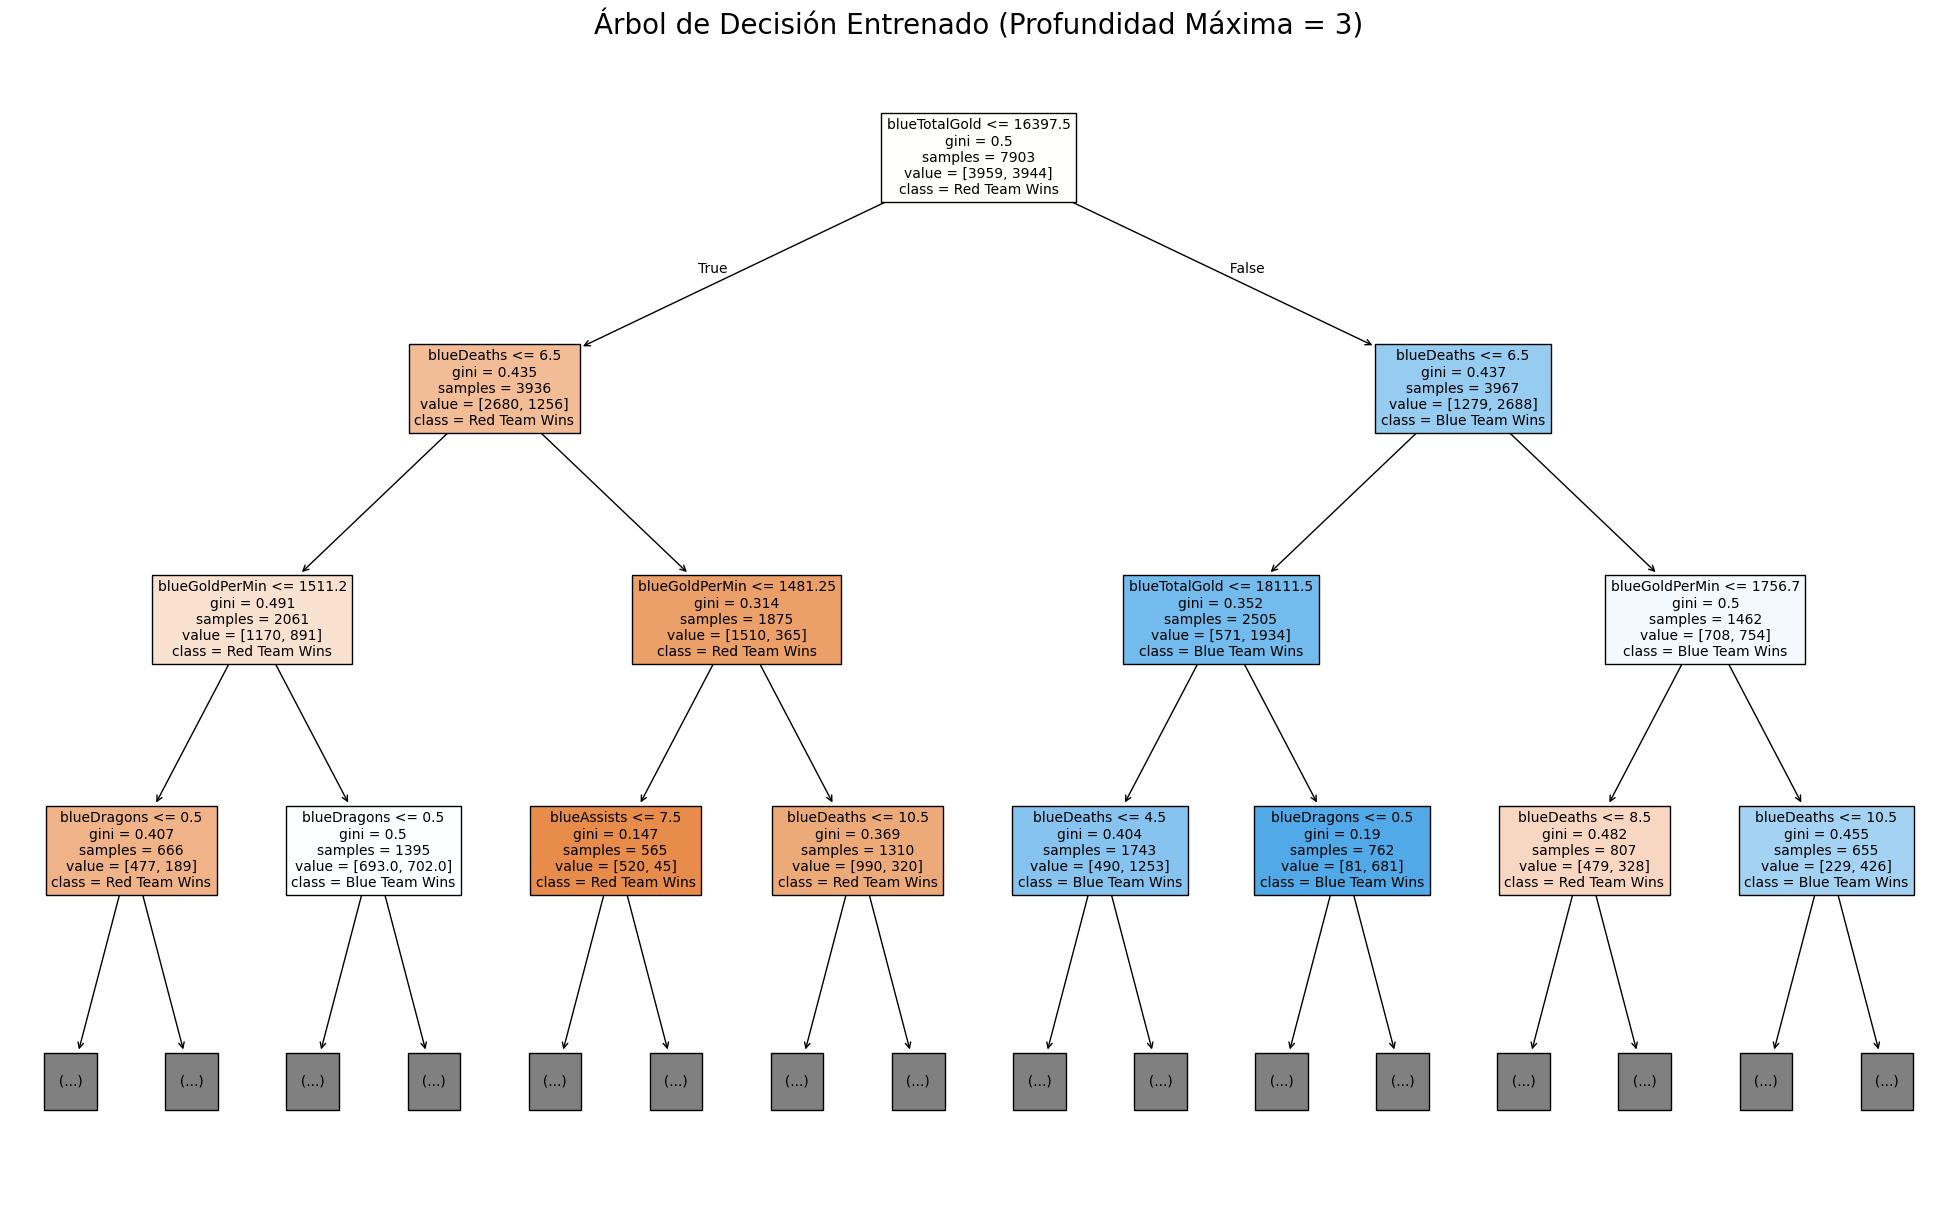

In [80]:
from sklearn.tree import plot_tree

plt.figure(figsize=(25,15))
plot_tree(
    dt_model,
    feature_names=X.columns.tolist(),
    class_names=['Red Team Wins', 'Blue Team Wins'],
    filled=True,
    max_depth=3,
    fontsize=10
)
plt.title('Árbol de Decisión Entrenado (Profundidad Máxima = 3)', fontsize=20)
plt.show()

#### 3.3 Feature importance

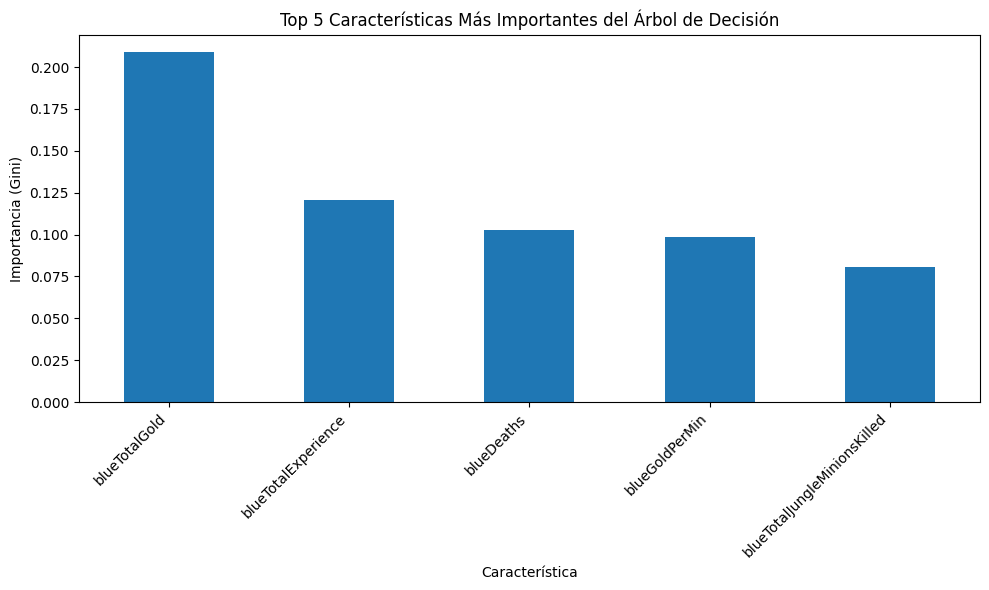

In [81]:
# Obtener la importancia de las características
feature_importances = dt_model.feature_importances_

# Crear una serie de pandas para facilitar el manejo y ordenamiento
importance_df = pd.Series(feature_importances, index=X.columns)

# Ordenar las características por importancia de forma descendente y seleccionar las 5 primeras
top_5_features = importance_df.nlargest(5)

# Graficar las 5 características más importantes
plt.figure(figsize=(10, 6))
top_5_features.plot(kind='bar')
plt.title('Top 5 Características Más Importantes del Árbol de Decisión')
plt.xlabel('Característica')
plt.ylabel('Importancia (Gini)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### Análisis de la Relevancia de las Características

Las 5 características más importantes según el árbol de decisión son:  

1.  **blueTotalGold (Oro Total del Equipo Azul)**
2.  **blueTotalExperience (Experiencia Total del Equipo Azul)**
3.  **blueDeaths (Muertes del Equipo Azul)**
4.  **blueGoldPerMin (Oro por Minuto del Equipo Azul)**
5.  **blueTotalJungleMinionsKilled (Súbditos de Jungla Asesinados por el Equipo Azul)**  

Desde la perspectiva de un jugador de League of Legends, estas características tienen un sentido lógico y son cruciales para determinar la ventaja y, por ende, la probabilidad de victoria en los primeros 10 minutos de juego.  

*   **Oro Total (blueTotalGold) y Oro por Minuto (blueGoldPerMin)**: En LoL, el oro es el recurso fundamental que permite a los jugadores comprar objetos, los cuales aumentan su poder. Un equipo con más oro y que genera oro más eficientemente (`GoldPerMin`) tendrá una ventaja significativa en términos de estadísticas de combate y capacidad para presionar objetivos. Es el factor más directo de "scaling" (crecimiento de poder) en el juego.

*   **Experiencia Total (blueTotalExperience)**: La experiencia se traduce directamente en niveles de campeón, lo que otorga acceso a habilidades más poderosas y a un aumento de estadísticas. Tener una ventaja de experiencia significa que los campeones aliados son más fuertes que los enemigos, lo que facilita las peleas y la toma de objetivos. Es un factor clave en la fase temprana y media del juego.

*   **Muertes (blueDeaths)**: Las muertes son un indicador directo de la desventaja. Cada muerte no solo otorga oro y experiencia al equipo enemigo, sino que también deja al jugador muerto fuera del mapa durante un tiempo, perdiendo oportunidades de farmear, presionar líneas u objetivos. Menos muertes para el equipo azul significan menos recursos para el rojo y más tiempo de actividad para el equipo azul, lo cual se correlaciona fuertemente con la victoria.

*   **Súbditos de Jungla Asesinados (blueTotalJungleMinionsKilled)**: Esta métrica es vital porque refleja la eficacia del jungla (un rol clave en LoL) y, en menor medida, de los "laners" que invaden la jungla enemiga. Una mayor cantidad de súbditos de jungla asesinados se traduce en más oro y experiencia para el equipo azul, lo que contribuye directamente a las métricas de oro y experiencia total, y por ende, a una mayor ventaja global.

### 4. Comparación Final

#### 4.1 ¿Qué modelo tuvo mejor desempeño numérico (Accuracy)?

Basándonos en los resultados, el modelo SVM con kernel lineal tuvo el mejor desempeño numérico en términos de Accuracy (73.28%).

#### 4.2 Si usted tuviera que explicarle a un analista de e-sports por qué ganó un equipo, ¿qué modelo usaría: el SVM o el Árbol? Justifique.

Para explicarle a un analista de e-sports por qué ganó un equipo, es preferible usar un Árbol de Decisión en lugar de un SVM, aunque el SVM tenga mayor precisión.

La razón principal es la interpretabilidad. Un Árbol de Decisión ofrece reglas claras y fáciles de seguir (por ejemplo, combinaciones de oro, muertes o experiencia) que permiten entender y comunicar qué factores llevaron a la victoria. En cambio, los SVM funcionan como una caja negra: basan su decisión en hiperplanos matemáticamente complejos, difíciles de traducir en explicaciones intuitivas.

Por ello, para análisis y comunicación de resultados en e-sports, el Árbol de Decisión es más útil.